In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters


from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

Mounted at /content/drive


In [ ]:
import os
import glob as glob
import numpy as np
import pandas as pd

path= '/content/drive/MyDrive/Total_CSV/input_'

activity = ["Hit","Kick","notHit","notShove","Shove"]
input = pd.DataFrame()
video_num = 340
count = 0

for i in range(1,video_num):
  for act in activity:
    address = path +act + str(i) +".csv"
    df = pd.read_csv(address,header=None)
    df_cut = df[:52]
    df_t = np.transpose(df_cut)
    df_t['activity'] = ("abuse" if act in ["Hit","Kick","Shove"] else "normal")
    df_t['video_num'] = count
    df_t['frame'] = [i for i in range(1,df_t.shape[0]+1)]
    input = pd.concat([input,df_t])
    count += 1

In [ ]:
input.head(100)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,activity,video_num,frame
0,0.0,0.000000,0.000000,-0.069552,-0.034340,-0.246229,0.083376,-0.000354,-3.057,-0.005914,-5.009491e-03,-0.000278,-0.162700,0.000000,0.000000,0.000000,0.000000,-0.040113,-0.326649,-0.163921,-0.122532,0.000000,0.000000,0.000000,0.000000,0.244841,-0.368691,0.000000,0.000000,0.000000,0.000000,-28.724371,-15.816546,3.022368,-3.588867,-28.724371,-15.816546,-6.170092,-1.350465,-2.113269,-6.167680,-44.725844,-22.580480,-35.916890,-16.614815,-35.916890,-16.614815,-35.916890,-16.614815,46.663181,17.972946,0.000000,abuse,0,1
1,1.0,0.000000,0.000000,0.298945,-0.203283,0.000514,-0.607511,-0.098054,-2.868,0.178851,-6.204328e-03,0.450883,0.153495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-29.601610,-16.063709,2.967017,-3.609356,-29.601610,-16.063709,88.821930,48.200408,97.724695,37.370254,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.713279,23.216963,0.000000,abuse,0,2
2,2.0,0.000000,0.000000,-0.078174,-0.401211,-0.391896,-0.974682,-0.082289,-0.010,0.124836,-6.952314e-03,-0.392561,-0.201736,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-22.593015,-12.041253,2.365655,-2.614200,-22.593015,-12.041253,58.001209,30.912530,64.074363,24.201307,0.000000,0.000000,-233.905971,-108.777033,-233.905971,-108.777033,-233.905971,-108.777033,49.851191,18.829121,0.000000,abuse,0,3
3,3.0,0.000000,0.000000,-0.087218,0.201437,0.318736,0.414520,-0.000295,2.817,0.076540,-1.503039e-03,-0.095512,-0.095610,0.000000,0.000000,0.000000,0.000000,0.351152,0.255227,0.286754,-0.063444,0.057784,-0.029936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000407,-5.517856,1.141903,-1.360871,-10.000407,-5.517856,-2.496940,-0.570734,-0.643680,-2.779369,-18.727169,-9.525976,-126.593316,-57.415507,-126.593316,-57.415507,-126.593316,-57.415507,22.072295,8.234756,0.000000,abuse,0,4
4,4.0,0.000000,0.000000,-0.065450,-0.086955,-0.076244,0.025305,-0.043188,0.000,-0.000977,-5.438151e-05,-0.406146,-0.659648,0.000000,0.000000,0.000000,0.000000,-0.101687,0.050930,-0.127131,0.152445,0.000000,0.000000,0.000000,0.000000,-0.026306,0.000621,0.000000,0.000000,0.000000,0.000000,-9.211340,-5.035056,1.119683,-1.181733,-9.211340,-5.035056,-6.415030,-1.783352,-1.516935,-6.952891,-46.710396,-23.809401,-16.833943,-7.897229,-16.833943,-7.897229,-16.833943,-7.897229,14.951701,5.576769,0.000000,abuse,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2.0,-0.040914,-0.122741,-0.061194,-0.001194,-0.071032,-0.145891,-0.062757,-2.837,0.001023,-2.042013e-05,0.001654,-0.073723,0.125340,0.001497,-0.001432,-0.000123,-0.363432,-0.143126,-0.290350,-0.145076,-0.511471,0.062605,-0.479509,-0.180511,-0.147150,-0.071723,0.190310,0.062757,-0.239141,-0.059816,-2.435943,0.973981,10.205822,6.320866,13.118779,-3.013943,-9.646975,0.086787,-0.436172,5.791399,9.305998,3.860972,-7.504534,-1.488313,2.022997,-3.930984,8.337629,-0.951343,19.676665,8.322324,24.210628,abuse,1,3
3,3.0,0.034365,0.034365,0.000142,-0.080848,-0.351669,-0.234233,-0.082720,-0.027,-0.001718,-2.762732e-03,0.229332,-0.115642,-0.167425,0.078268,-0.094503,0.000481,-0.001594,-0.000638,-0.115961,-0.000239,-0.249266,0.004225,-0.003436,-0.197562,-0.113172,-0.000757,-0.165327,-0.081245,-0.100345,0.098386,-2.295363,0.882458,9.264954,5.739651,11.828854,-2.650643,-11.170444,0.002751,-0.412363,6.667397,10.966631,4.310797,-13.386859,-2.760821,3.615718,-7.013930,14.877738,-1.594036,13.077897,5.494821,15.978373,abuse,1,4
4,4.0,0.072875,0.02429

데이터 불러오는 코드 작성- > 데이터 np.float64

In [ ]:
# input.rename(columns = {
#                 'd_vector_1_x', 'd_vector_1_y',
#                 'd_vector_2_x', 'd_vector_2_y',
#                 'd_vector_3_x', 'd_vector_3_y',
#                 'd_vector_4_x', 'd_vector_4_y',
#                 'd_vector_5_x', 'd_vector_5_y',
#                 'd_vector_6_x', 'd_vector_6_y',
#                 'd_vector_7_x', 'd_vector_7_y',
#                 'd_vector_8_x', 'd_vector_8_y',
#                 'd_vector_9_x', 'd_vector_9_y',
#                 'd_vector_10_x', 'd_vector_10_y',
#                 'd_vector_11_x', 'd_vector_11_y',
#                 'd_vector_12_x', 'd_vector_12_y',
#                 'd_vector_13_x', 'd_vector_13_y',
#                 'd_vector_14_x', 'd_vector_14_y',
#                 'r_vector_1_x', 'r_vector_1_y',
#                 'r_vector_2_x', 'r_vector_2_y',
#                 'r_vector_3_x', 'r_vector_3_y',
#                 'r_vector_4_x', 'r_vector_4_y',
#                 'r_vector_5_x', 'r_vector_5_y',
#                 'r_vector_6_x', 'r_vector_6_y',
#                 'r_vector_7_x', 'r_vector_7_y',
#                 'r_vector_8_x', 'r_vector_8_y',
#                 'r_vector_9_x', 'r_vector_9_y',
#                 'r_vector_10_x', 'r_vector_10_y',
#                 'r_vector_11_x', 'r_vector_11_y',
#                 'activity','video_num','frame'
#                 })
                

input.dropna(axis=0, how='any', inplace=True)

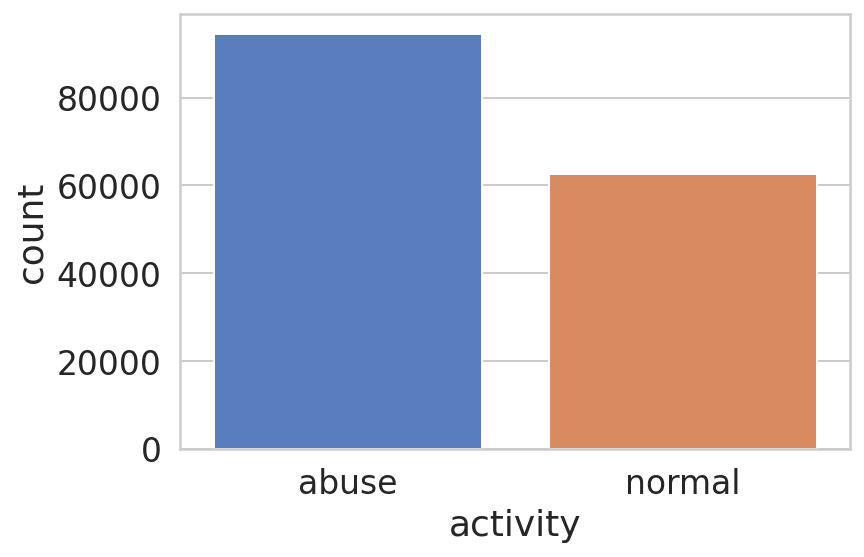

In [ ]:
sns.countplot(x = 'activity',
              data = input,
              order = input.activity.value_counts().index);

In [ ]:
print(count)

1695


In [ ]:
# 비디오 수 보고 다시 판단
df_train = input[input['video_num'] <= 1360]
df_test = input[input['video_num'] > 1360]

In [ ]:
# scale_columns = [ 'd_vector_1_x', 'd_vector_1_y',
#                 'd_vector_2_x', 'd_vector_2_y',
#                 'd_vector_3_x', 'd_vector_3_y',
#                 'd_vector_4_x', 'd_vector_4_y',
#                 'd_vector_5_x', 'd_vector_5_y',
#                 'd_vector_6_x', 'd_vector_6_y',
#                 'd_vector_7_x', 'd_vector_7_y',
#                 'd_vector_8_x', 'd_vector_8_y',
#                 'd_vector_9_x', 'd_vector_9_y',
#                 'd_vector_10_x', 'd_vector_10_y',
#                 'd_vector_11_x', 'd_vector_11_y',
#                 'd_vector_12_x', 'd_vector_12_y',
#                 'd_vector_13_x', 'd_vector_13_y',
#                 'd_vector_14_x', 'd_vector_14_y',
#                 'r_vector_1_x', 'r_vector_1_y',
#                 'r_vector_2_x', 'r_vector_2_y',
#                 'r_vector_3_x', 'r_vector_3_y',
#                 'r_vector_4_x', 'r_vector_4_y',
#                 'r_vector_5_x', 'r_vector_5_y',
#                 'r_vector_6_x', 'r_vector_6_y',
#                 'r_vector_7_x', 'r_vector_7_y',
#                 'r_vector_8_x', 'r_vector_8_y',
#                 'r_vector_9_x', 'r_vector_9_y',
#                 'r_vector_10_x', 'r_vector_10_y',
#                 'r_vector_11_x', 'r_vector_11_y'
# ]
from sklearn.preprocessing import RobustScaler

scale_columns = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
                 26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]

scaler = RobustScaler()

scaler = scaler.fit(df_train[scale_columns])

df_train.loc[:, scale_columns] = scaler.transform(
  df_train[scale_columns].to_numpy()
)

df_test.loc[:, scale_columns] = scaler.transform(
  df_test[scale_columns].to_numpy()
)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [ ]:
from scipy import stats
TIME_STEPS = 40
STEP =40 #window 부분 - 파라미터 조정하면서 봐야할듯....

X_train, y_train = create_dataset(
    df_train[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
                 26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]],
    df_train.activity,
    TIME_STEPS,
    STEP
)

X_test, y_test = create_dataset(
    df_test[[ 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,
                 26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]],
    df_test.activity,
    TIME_STEPS,
    STEP
)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(3035, 40, 52) (3035, 1)
(887, 40, 52) (887, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [ ]:
from keras import regularizers
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
      keras.layers.LSTM(
          units=64,
          input_shape=[X_train.shape[1], X_train.shape[2]],
          dropout = 0.5,
          #kernel_regularizer=tf.keras.regularizers.l1(0.0001),
          #activity_regularizer=tf.keras.regularizers.l2(0.0001),

          return_sequences = True


      )
    )
  
)
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64,dropout = 0.5)))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(y_train.shape[1], activation='sigmoid'))


model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['acc']
)

In [ ]:
def optimal_epoch(model_hist):
    
    min_epoch = np.argmin(model_hist.history['val_loss']) + 1
    print("Minimum validation loss reached in epoch {}".format(min_epoch))
    return min_epoch


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs = 50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/50
86/86 [==============================] - 15s 36ms/step - loss: 0.6623 - acc: 0.6104 - val_loss: 0.7011 - val_acc: 0.5559
Epoch 2/50
86/86 [==============================] - 1s 15ms/step - loss: 0.6306 - acc: 0.6525 - val_loss: 0.6515 - val_acc: 0.6217
Epoch 3/50
86/86 [==============================] - 1s 15ms/step - loss: 0.6116 - acc: 0.6609 - val_loss: 0.6082 - val_acc: 0.6875
Epoch 4/50
86/86 [==============================] - 1s 15ms/step - loss: 0.5603 - acc: 0.7118 - val_loss: 0.6146 - val_acc: 0.7336
Epoch 5/50
86/86 [==============================] - 1s 16ms/step - loss: 0.5548 - acc: 0.7107 - val_loss: 0.6268 - val_acc: 0.7237
Epoch 6/50
86/86 [==============================] - 1s 15ms/step - loss: 0.5068 - acc: 0.7517 - val_loss: 0.6510 - val_acc: 0.7204
Epoch 7/50
86/86 [==============================] - 1s 15ms/step - loss: 0.5133 - acc: 0.7510 - val_loss: 0.6208 - val_acc: 0.7237
Epoch 8/50
86/86 [==============================] - 1s 15ms/step - loss: 0.4985 - 

In [ ]:
rop_min = optimal_epoch(history)

Minimum validation loss reached in epoch 48


In [ ]:
print("[test data]")
print("val_acc = ",max(history.history['val_acc']))
print("score = " ,max(history.history['val_acc']) *100)

[test data]
val_acc =  0.8125
score =  81.25


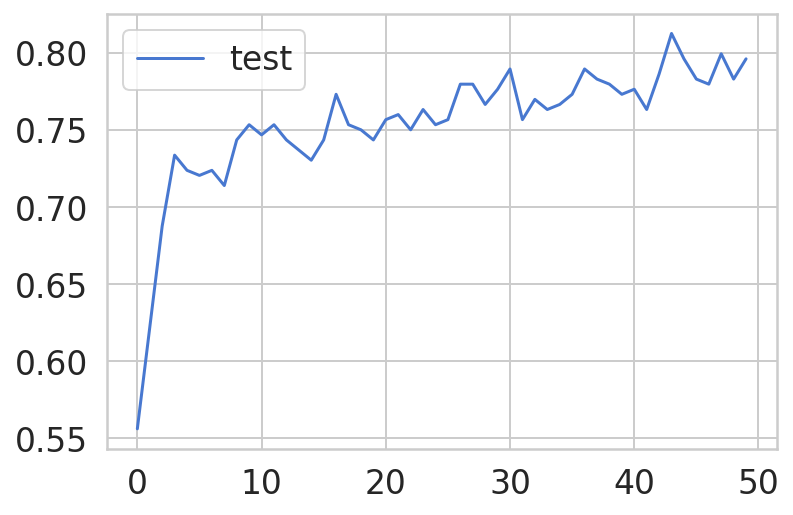

In [ ]:
#plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend();

In [ ]:
from keras.models import load_model

model.save('final_model.h5')

In [ ]:
print(X_test.shape)

(887, 40, 52)


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/final_model.h5')

In [ ]:
 new_model.evaluate(X_test,  y_test)

28/28 [==============================] - 2s 7ms/step - loss: 0.4944 - acc: 0.8117


[0.4943791329860687, 0.8117249011993408]

In [ ]:
new_model.predict(X_test)

array([[0.9777869 , 0.02010572],
       [0.9837679 , 0.01142741],
       [0.99463767, 0.01266874],
       ...,
       [0.2515903 , 0.627149  ],
       [0.02743033, 0.93128484],
       [0.294968  , 0.51904887]], dtype=float32)

In [ ]:
model.evaluate(X_test, y_test)

28/28 [==============================] - 0s 8ms/step - loss: 0.5205 - acc: 0.8106


[0.5204739570617676, 0.8105975389480591]

heatmap 출력

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, class_names):
  cm = confusion_matrix(y_true, y_pred)
  fig, ax = plt.subplots(figsize=(18, 16)) 
  ax = sns.heatmap(
      cm, 
      annot=True, 
      fmt="d", 
      cmap=sns.diverging_palette(220, 20, n=7),
      ax=ax
  )

  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)
  b, t = plt.ylim() 
  b += 0.5 
  t -= 0.5 
  plt.ylim(b, t) 
  plt.show() 